## You’ve been asked to explore differences between rates of death from Covid in the east vs. the west. You download some data (covidPerCapita) from the CDC that has Covid death rates per capita (coviddata) by zip code (zip). Not all zip codes are reporting, and even handling the data from those that do report is difficult so you select a random sample of zip codes in the east and the west.

### Take a look at the distributions of death from Covid within each region. What do you see? Would you assume approximate Normality? Equal variances?

Based on the QQ-plot, I assume normality. Based on the variance hypothesis test, I assume equal variances

In [1]:
library(ggpubr)
covid_data <- read.csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/master/coviddata.csv")

Loading required package: ggplot2



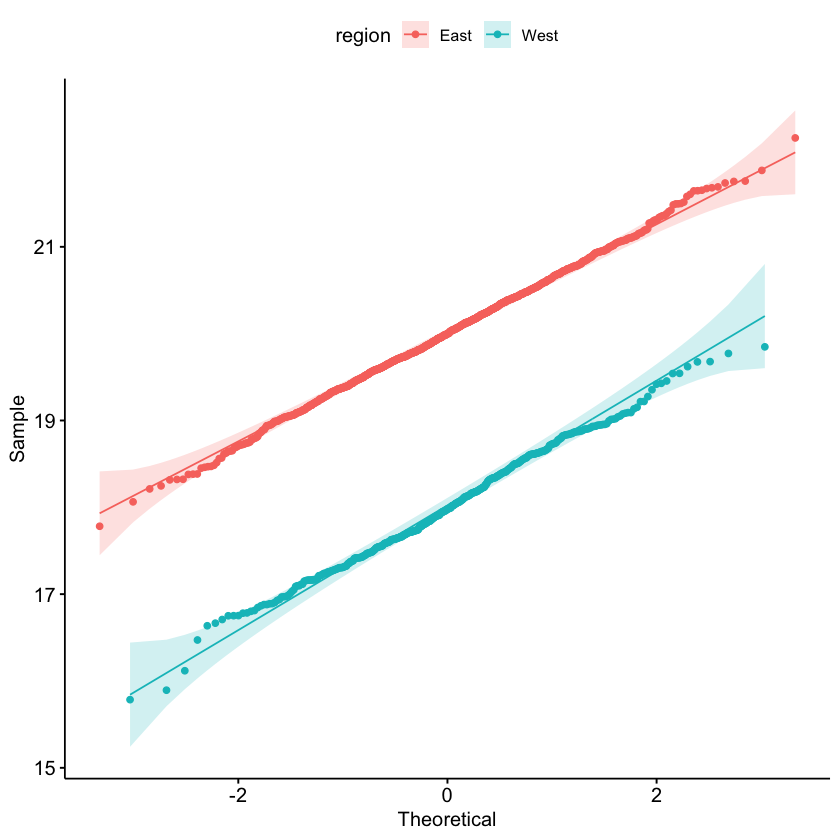

In [10]:
covid_data  %>% 
    ggqqplot(x="covidDeathsPerCapita", color="region")

Warning message:
"Using `bins = 30` by default. Pick better value with the argument `bins`."


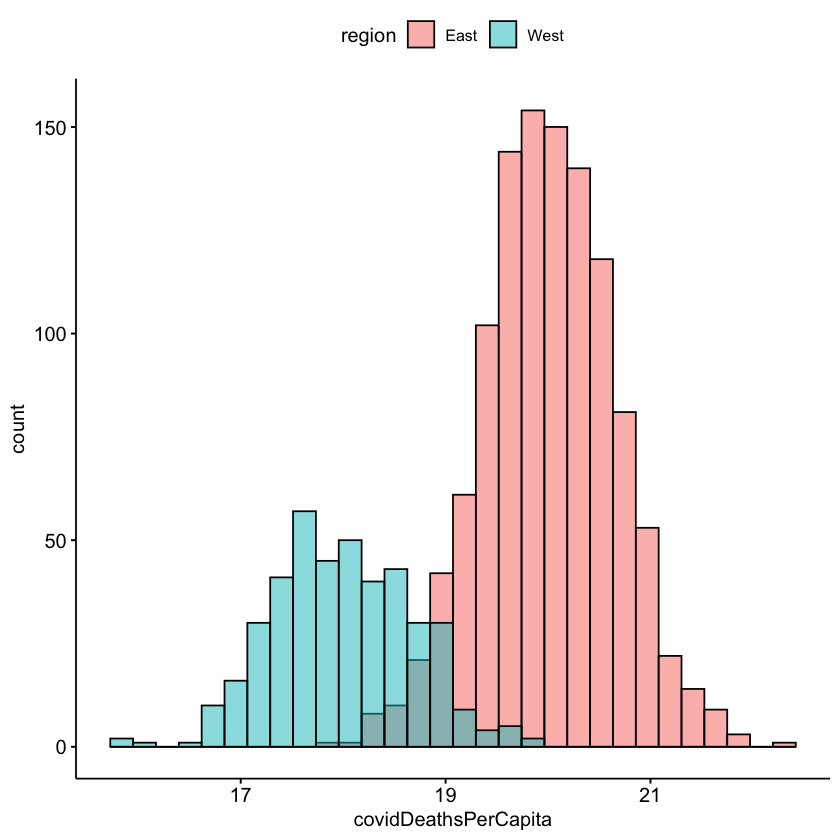

In [17]:
covid_data  %>% 
    gghistogram(x="covidDeathsPerCapita", fill="region")

In [11]:
var.test(covidDeathsPerCapita~region, data=covid_data)


	F test to compare two variances

data:  covidDeathsPerCapita by region
F = 0.89721, num df = 1134, denom df = 415, p-value = 0.1738
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7628915 1.0489089
sample estimates:
ratio of variances 
         0.8972104 


### Conduct the correct test to see if there is a significant difference in per capita deaths from Covid in the east region vs the west region. Discuss assumptions and why you chose the method you did.

Assumption of Normality between groups is applies

Assumption of equal variance between each group aslo applies

Because of this I used a pooled sample t-test


In [19]:
t.test(covidDeathsPerCapita~region, data=covid_data, var.equal = TRUE)


	Two Sample t-test

data:  covidDeathsPerCapita by region
t = 53.6, df = 1549, p-value < 2.2e-16
alternative hypothesis: true difference in means between group East and group West is not equal to 0
95 percent confidence interval:
 1.928196 2.074681
sample estimates:
mean in group East mean in group West 
          20.00643           18.00500 


### Write out the hypothesis test (include null and alternative hypothesis, test statistic, p-value and conclusion….conclusion should be in terms of the problem).

H0: There is not a significant difference in the covid deaths per capita per region

HA: A significant difference in sampe means exists

t = 53.6

p-value: < 2.2e-16

Conclusion: There is signifcant evidence that a difference in covid deaths per captia exists between the regions

### Can you conclude from this analysis that individuals in one region have had higher death rates than individuals in the other region? Why or why not?

No, you need to do a post-hoc test to tell which region had higher average death rates.